# CIV1498 - Introduction to Data Science
## Project 2

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Goal

In this project we will explore Airbnb data for the city of Toronto.

The data can be dounloaded from this link:
http://insideairbnb.com/get-the-data.html


# Setup Notebook

In [2]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 6.7 MB/s 
     |████████████████████████████████| 6.3 MB 47.1 MB/s 
     |████████████████████████████████| 16.7 MB 33.3 MB/s 


In [3]:
# 3rd party imports
import os
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pylab as plt
import geopandas as gpd

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

# Import the Data

In [4]:
complete_data = pd.read_csv('/content/drive/MyDrive/Data_Science_Project_2/listings.csv', index_col='id')
complete_data.head(3)

,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
1419,https://www.airbnb.com/rooms/1419,20211205213140,2021-12-06,Beautiful home in amazing area!,"This large, family home is located in one of T...",The apartment is located in the Ossington stri...,https://a0.muscache.com/pictures/76206750/d643...,1565,https://www.airbnb.com/users/show/1565,Alexandra,...,5.00,5.00,5.00,NaN,f,1,1,0,0,0.09
8077,https://www.airbnb.com/rooms/8077,20211205213140,2021-12-06,Downtown Harbourfront Private Room,Guest room in a luxury condo with access to al...,NaN,https://a0.muscache.com/pictures/11780344/141c...,22795,https://www.airbnb.com/users/show/22795,Kathie & Larry,...,4.90,4.92,4.83,NaN,t,2,1,1,0,1.50
23691,https://www.airbnb.com/rooms/23691,20211205213140,2021-12-06,Queen Bedroom close to downtown,<b>The space</b><br />Nestled in the middle of...,NaN,https://a0.muscache.com/pictures/615528/d09ab3...,93825,https://www.airbnb.com/users/show/93825,Yohan & Sarah,...,4.93,4.34,4.73,NaN,t,2,0,2,0,1.73


# Explore the Columns and Decide on Most Relevent Ones

In [5]:
complete_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15261 entries, 1419 to 53684479
Data columns (total 73 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   listing_url                                   15261 non-null  object 
 1   scrape_id                                     15261 non-null  int64  
 2   last_scraped                                  15261 non-null  object 
 3   name                                          15260 non-null  object 
 4   description                                   14810 non-null  object 
 5   neighborhood_overview                         9239 non-null   object 
 6   picture_url                                   15261 non-null  object 
 7   host_id                                       15261 non-null  int64  
 8   host_url                                      15261 non-null  object 
 9   host_name                                     15250 non

### The complete dataframe has `74` columns and `15261` rows
There are some columns that are irrelevent for predicting the price, we decided to drop thos before doing EDA and imputing missing values.

### Irrelevent columns

In [6]:
irrelevent_1_to_24 = ['listing_url', 'scrape_id', 'name', 'description','neighbourhood', 'neighborhood_overview', 'host_total_listings_count',
                      'picture_url', 'host_url','host_name','host_since', 'host_location', 'host_about', 'host_response_time', 'host_thumbnail_url',
                      'host_picture_url', 'host_neighbourhood', 'host_verifications', 'last_scraped', 'bathrooms_text']

irrelevent_25_to_48 = ['host_identity_verified', 'neighbourhood_group_cleansed', 'bathrooms', 'minimum_minimum_nights',
                       'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm',
                       'maximum_nights_avg_ntm', 'calendar_updated', 'maximum_nights']

irrelevent_49_to_73 = ['has_availability', 'first_review', 'last_review', 'license', 'calculated_host_listings_count',
                       'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms',
                       'calculated_host_listings_count_shared_rooms', 'calendar_last_scraped']

irrelevent_columns = irrelevent_1_to_24 + irrelevent_25_to_48 + irrelevent_49_to_73

In [7]:
# Drop the irrelevent columns
listings_data = complete_data.drop(columns=irrelevent_columns)
listings_data.shape

(15261, 33)

### See how many missing values any column has

In [8]:
listings_data.isnull().sum()

host_id                           0
host_response_rate             6565
host_acceptance_rate           6526
host_is_superhost                11
host_listings_count              11
host_has_profile_pic             11
neighbourhood_cleansed            0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
bedrooms                       1127
beds                            738
amenities                         0
price                             0
minimum_nights                    0
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
number_of_reviews                 0
number_of_reviews_ltm             0
number_of_reviews_l30d            0
review_scores_rating           3486
review_scores_accuracy         3653
review_scores_cleanliness      3651
review_scores_checkin       

The price needs to be changed from string to float

In [9]:
listings_data['price'] = listings_data['price'].apply(lambda x: x.replace('$', '').replace(',', '')if isinstance(x, str) else x).astype('float')

### Describe the numerical data and check for outliers

In [10]:
listings_data.describe().round(1)

,host_id,host_listings_count,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,availability_30,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,15261.0,15250.0,15261.0,15261.0,15261.0,14134.0,14523.0,15261.0,15261.0,15261.0,...,15261.0,15261.0,11775.0,11608.0,11610.0,11607.0,11607.0,11606.0,11607.0,11775.0
mean,124933187.6,6.2,43.7,-79.4,3.1,1.4,1.7,155.5,26.3,9.0,...,4.2,0.5,4.6,4.8,4.7,4.8,4.8,4.8,4.7,1.6
std,121620862.6,21.2,0.0,0.1,2.0,0.8,1.1,371.2,40.2,11.5,...,11.2,1.5,0.7,0.5,0.5,0.4,0.4,0.4,0.5,4.3
min,1565.0,0.0,43.6,-79.6,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
25%,22626208.0,1.0,43.6,-79.4,2.0,1.0,1.0,67.0,5.0,0.0,...,0.0,0.0,4.6,4.7,4.6,4.8,4.8,4.8,4.6,0.2
50%,79920634.0,1.0,43.7,-79.4,2.0,1.0,1.0,101.0,28.0,2.0,...,0.0,0.0,4.8,4.9,4.8,5.0,5.0,4.9,4.8,0.6
75%,209346617.0,4.0,43.7,-79.4,4.0,2.0,2.0,165.0,28.0,18.0,...,3.0,0.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.6
max,434447617.0,272.0,43.8,-79.1,16.0,9.0,18.0,13000.0,1125.0,30.0,...,188.0,17.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,153.0


# Removing outliers
An outlier is an observation that needs to be removed from the mass of data. From the describe function we can see that price has a max value of 13000 dollars, but with an average price of 155.5 dollars and 75% having price below 165 dollars. 
The same applies for minimum_nights column with a maximum of 1125 days, over 3 years. 
For that we can use the Interquartile Rule (IQR Score). To do that, we would find the first quartile Q1, the third quartile Q3 and the IQR= Q3 - Q1. Then we would calculate the boundaries Q3 + 1.5 x IQR and Q1 - 1.5 x IQR


In [11]:
# IQR rule for variable price
q1_price = listings_data['price'].quantile(q=0.25)
q3_price = listings_data['price'].quantile(q=0.75)
IQR_price = q3_price - q1_price

print('IQR price: ', IQR_price)

sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price

print('Upper price limit: ', sup_price)
print('Lower price limit: ', inf_price)

print()

# IQR rule for variable minimum_nights
q1_minn = listings_data['minimum_nights'].quantile(q=0.25)
q3_minn = listings_data['minimum_nights'].quantile(q=0.75)
IQR_minn = q3_minn - q1_minn

print('IQR minimum nights: ', IQR_minn)

sup_minn = q3_minn + 1.5 * IQR_minn
inf_minn = q1_minn - 1.5 * IQR_minn

print('Upper minimum nights limit: ', sup_minn)
print('Lower minimum nights limit: ', inf_minn)

IQR price:  98.0
Upper price limit:  312.0
Lower price limit:  -80.0

IQR minimum nights:  23.0
Upper minimum nights limit:  62.5
Lower minimum nights limit:  -29.5


In [12]:
listings_data_clean = listings_data[(listings_data['price'] <= sup_price) & (listings_data['price'] > 0) & (listings_data['minimum_nights'] <= sup_minn)]

Text(0.5, 1.0, 'Distribution of listings prices')

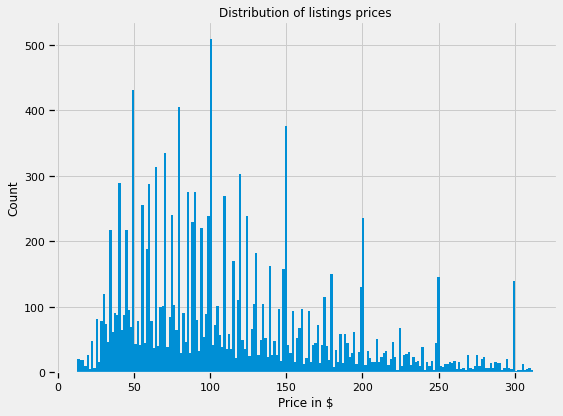

In [13]:
ax = plt.subplots(figsize=(8, 6))
plt.hist(listings_data_clean['price'],bins=200)
plt.ylabel('Count')
plt.xlabel('Price in $')
plt.title('Distribution of listings prices')

# Fill Missing Values that Does not Cause `Data Leakage`

In [14]:
# Create a function for visualizing numerical data distribution to decide whether to use the mean or median

def dist_visualizer(data_series):

  ax = data_series.hist(bins=15, density=True, stacked=True, alpha=0.3, figsize=(10,4))
  data_series.plot(kind='density')

  ax.set(xlabel=data_series.name)
  ax.set_xlim(0, (data_series.max() * 1.25))

  # plot the mean
  plt.axvline(x=data_series.mean(), color='red', ls='--')
  # plot the median
  plt.axvline(x=data_series.median(), color='yellow', ls='--')

  plt.text(data_series.mean()*0.97, 0,'mean = {}'.format(round(data_series.mean(),1)), rotation=90)
  plt.text(data_series.median()*1.01, 0,'median = {}'.format(round(data_series.median(),1)), rotation=90)

  plt.legend()
  plt.show()


### `host_response_rate` column:


In [15]:
listings_data_clean['host_response_rate']=listings_data_clean['host_response_rate'].str.replace('%' , '').astype(float)

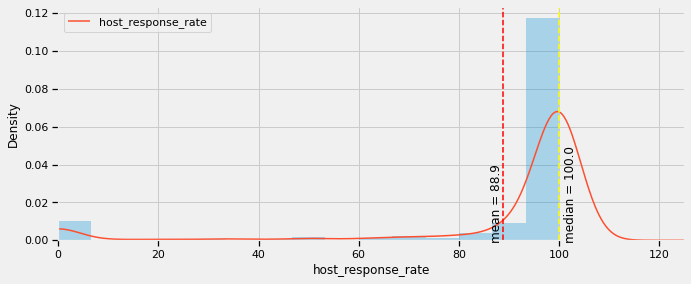

In [16]:
dist_visualizer(listings_data_clean['host_response_rate'])

In [17]:
listings_data_clean['host_response_rate']=listings_data_clean['host_response_rate'].fillna(listings_data_clean['host_response_rate'].median())

### `host_acceptance_rate` column:

In [18]:
listings_data_clean['host_acceptance_rate']=listings_data_clean['host_acceptance_rate'].str.replace('%' , '').astype(float)

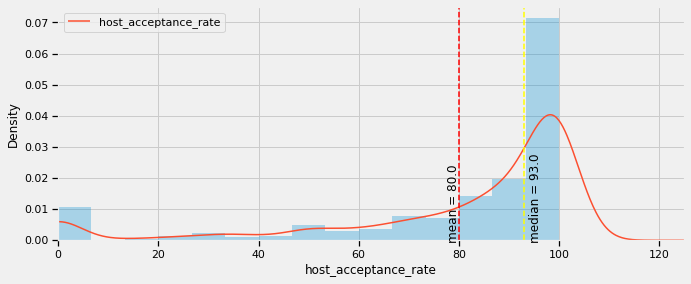

In [19]:
dist_visualizer(listings_data_clean['host_acceptance_rate'])

In [20]:
listings_data_clean['host_acceptance_rate']=listings_data_clean['host_acceptance_rate'].fillna(listings_data_clean['host_acceptance_rate'].median())

### `host_is_superhost` column:           

In [21]:
listings_data_clean[(listings_data_clean['host_is_superhost'].isnull()) |
                    (listings_data_clean['host_listings_count'].isnull()) |
                    (listings_data_clean['host_has_profile_pic'].isnull())]

,host_id,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,neighbourhood_cleansed,latitude,longitude,property_type,...,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
4833093,9325230,100.0,93.0,NaN,NaN,NaN,High Park-Swansea,43.65277,-79.45188,Entire residential home,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,NaN
6104732,31675651,100.0,93.0,NaN,NaN,NaN,Waterfront Communities-The Island,43.65095,-79.35694,Entire rental unit,...,0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,f,0.01
14946272,94046922,100.0,93.0,NaN,NaN,NaN,Pelmo Park-Humberlea,43.70999,-79.52085,Private room in guest suite,...,0,4.50,4.25,3.75,4.75,4.25,4.50,4.50,f,0.22
17417181,75779190,100.0,93.0,NaN,NaN,NaN,Edenbridge-Humber Valley,43.68364,-79.51211,Private room in rental unit,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,NaN
25982038,94046922,100.0,93.0,NaN,NaN,NaN,Pelmo Park-Humberlea,43.71101,-79.52080,Private room in residential home,...,0,4.33,5.00,3.33,5.00,5.00,4.67,3.67,f,0.10
26135477,94046922,100.0,93.0,NaN,NaN,NaN,Pelmo Park-Humberlea,43.70908,-79.52040,Private room in residential home,...,0,2.50,3.00,2.50,4.00,4.50,4.00,2.50,f,0.05
26746164,201103629,100.0,93.0,NaN,NaN,NaN,Annex,43.66976,-79.39329,Entire serviced apartment,...,4,5.00,4.98,5.00,5.00,4.95,4.98,4.85,f,3.00
39823779,294165506,100.0,93.0,NaN,NaN,NaN,Parkwoods-Donalda,43.75295,-79.33217,Entire rental unit,...,0,5.00,5.00,5.00,5.00,5.00,4.89,4.89,f,0.37
43010702,320487068,100.0,93.0,NaN,NaN,NaN,Scarborough Village,43.74353,-79.21060,Private room in residential home,...,1,4.73,4.82,4.91,4.94,4.79,4.73,4.76,t,1.62


Dropping the `nan` values of the `host_is_superhost`, `host_listings_count`, and `host_has_profile_pic`:

In [22]:
to_be_dropped = listings_data_clean[(listings_data_clean['host_is_superhost'].isnull()) |
                                    (listings_data_clean['host_listings_count'].isnull()) |
                                    (listings_data_clean['host_has_profile_pic'].isnull())].index

listings_data_clean=listings_data_clean.drop(index=to_be_dropped)

### `review_scores_rating` column:

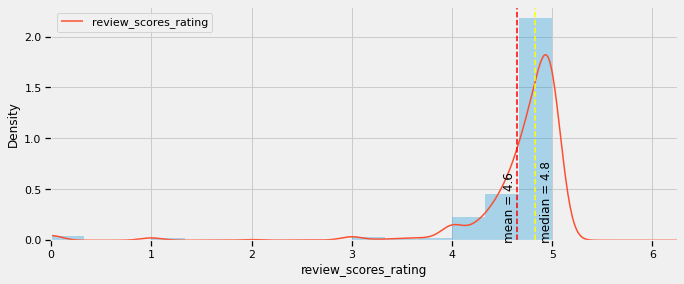

In [23]:
dist_visualizer(listings_data_clean['review_scores_rating'])

In [24]:
listings_data_clean['review_scores_rating']=listings_data_clean['review_scores_rating'].fillna(listings_data_clean['review_scores_rating'].median())

### `review_scores_accuracy` column:

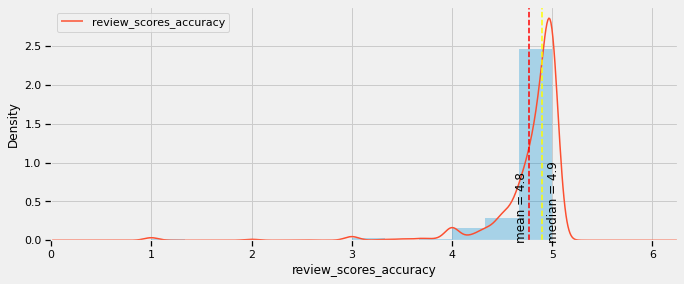

In [25]:
dist_visualizer(listings_data_clean['review_scores_accuracy'])

In [26]:
listings_data_clean['review_scores_accuracy']=listings_data_clean['review_scores_accuracy'].fillna(listings_data_clean['review_scores_accuracy'].median())

### `review_scores_cleanliness` column:     


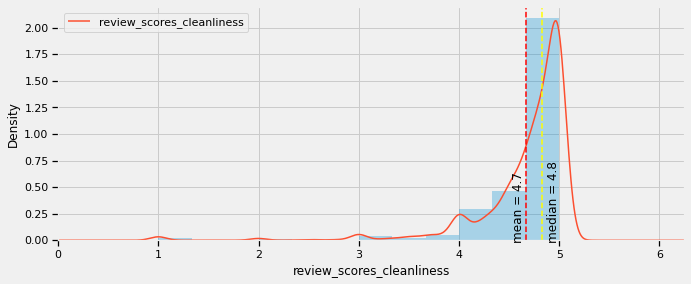

In [27]:
dist_visualizer(listings_data_clean['review_scores_cleanliness'])

In [28]:
listings_data_clean['review_scores_cleanliness']=listings_data_clean['review_scores_cleanliness'].fillna(listings_data_clean['review_scores_cleanliness'].median())

### `review_scores_checkin` column:

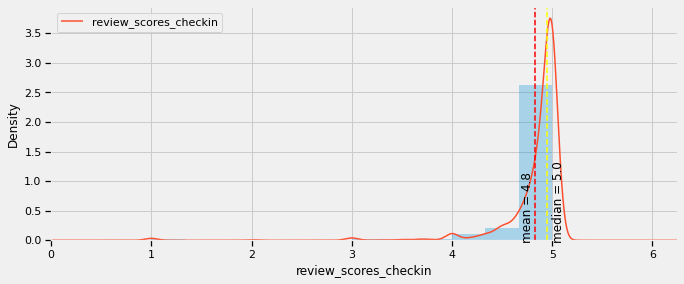

In [29]:
dist_visualizer(listings_data_clean['review_scores_checkin'])

In [30]:
listings_data_clean['review_scores_checkin']=listings_data_clean['review_scores_checkin'].fillna(listings_data_clean['review_scores_checkin'].median())

### `review_scores_communication` column:

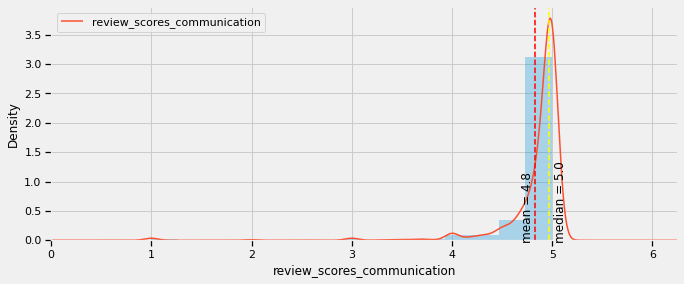

In [31]:
dist_visualizer(listings_data_clean['review_scores_communication'])

In [32]:
listings_data_clean['review_scores_communication']=listings_data_clean['review_scores_communication'].fillna(listings_data_clean['review_scores_communication'].median())

### `review_scores_location` column:

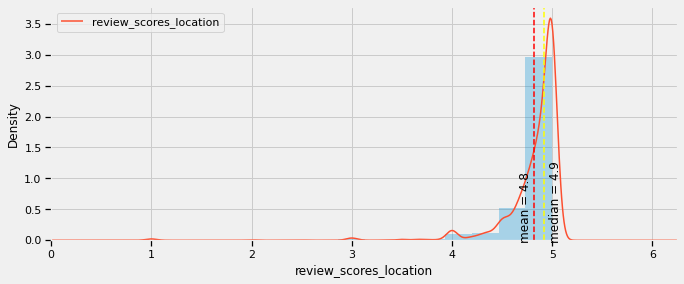

In [33]:
dist_visualizer(listings_data_clean['review_scores_location'])

In [34]:
listings_data_clean['review_scores_location']=listings_data_clean['review_scores_location'].fillna(listings_data_clean['review_scores_location'].median())

### `review_scores_value` column:

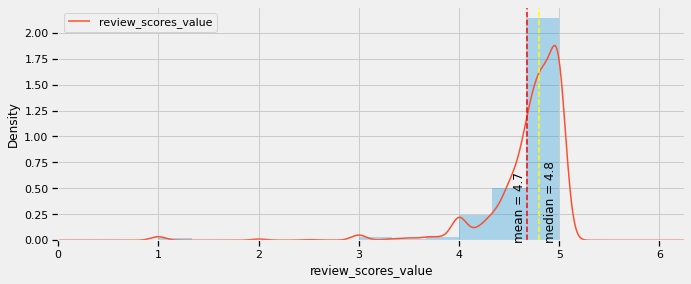

In [35]:
dist_visualizer(listings_data_clean['review_scores_value'])

In [36]:
listings_data_clean['review_scores_value']=listings_data_clean['review_scores_value'].fillna(listings_data_clean['review_scores_value'].median())

### `reviews_per_month` column:

In [37]:
listings_data_clean['reviews_per_month']=listings_data_clean['reviews_per_month'].fillna(0)

# Again check the missing values

In [38]:
listings_data_clean.isnull().sum()

host_id                           0
host_response_rate                0
host_acceptance_rate              0
host_is_superhost                 0
host_listings_count               0
host_has_profile_pic              0
neighbourhood_cleansed            0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
bedrooms                       1052
beds                            680
amenities                         0
price                             0
minimum_nights                    0
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
number_of_reviews                 0
number_of_reviews_ltm             0
number_of_reviews_l30d            0
review_scores_rating              0
review_scores_accuracy            0
review_scores_cleanliness         0
review_scores_checkin       

### Which rental types are mostly listed and what's their average price?


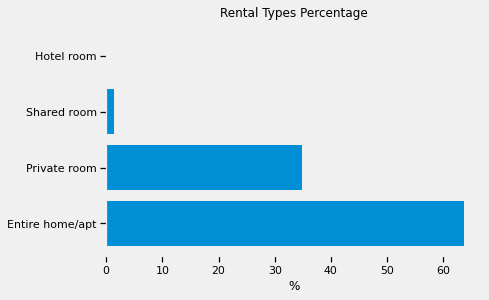

In [39]:
rental_type = listings_data_clean['room_type'].value_counts(normalize=True) * 100
plt.barh(rental_type.index, rental_type.values, align='center')
plt.title('Rental Types Percentage')
plt.xlabel('%')
plt.grid(False)

In [40]:
rental_type_price = listings_data_clean.groupby(['room_type'])['price'].mean().sort_values(ascending=False)
rental_type

Entire home/apt    63.744557
Private room       34.796807
Shared room         1.335269
Hotel room          0.123367
Name: room_type, dtype: float64

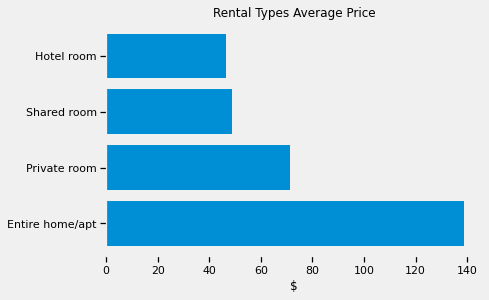

In [41]:
rental_type_price = listings_data_clean.groupby(['room_type'])['price'].mean().sort_values(ascending=False)
plt.barh(rental_type_price.index, rental_type_price.values, align='center')
plt.title('Rental Types Average Price')
plt.xlabel('$')
plt.grid(False)

In [42]:
rental_type_price

room_type
Entire home/apt    138.823657
Private room        71.201668
Shared room         48.798913
Hotel room          46.294118
Name: price, dtype: float64

The entire space is mostly rented and has the highest price average, we can now see the rental size, for that we will check the number of bedrooms.


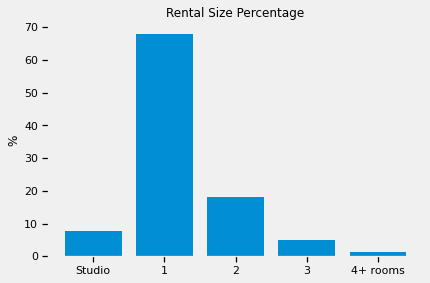

In [43]:
listings_data_clean['bedrooms'] = listings_data_clean['bedrooms'].fillna(0)
listings_data_clean['beds'] = listings_data_clean['beds'].fillna(listings_data_clean['bedrooms'])
rental_size=listings_data_clean['bedrooms'].value_counts()
rental_size.index=rental_size.index.astype(int)
rental_size=rental_size.groupby(rental_size.index.to_series().mask(rental_size.index > 3, '4+ rooms')).sum()*100/len(listings_data_clean['bedrooms'])
rental_size.rename(index={0:'Studio'},inplace=True)
rental_size.index=rental_size.index.astype(str)

plt.bar(rental_size.index, rental_size.values, align='center')
plt.title('Rental Size Percentage')
plt.ylabel('%')
plt.grid(False)

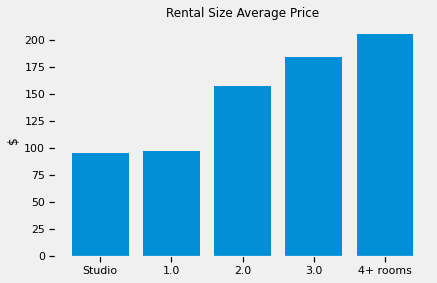

In [44]:
rental_size_price = listings_data_clean.copy()
rental_size_price.loc[rental_size_price['bedrooms'] > 3, 'bedrooms'] = '4+ rooms'
rental_size_price['bedrooms'] = rental_size_price['bedrooms'].astype(str)
rental_size_price = rental_size_price.groupby(rental_size_price['bedrooms'])['price'].mean()
rental_size_price.rename(index={'0.0':'Studio'},inplace=True)
plt.bar(rental_size_price.index, rental_size_price.values, align='center')
plt.title('Rental Size Average Price')
plt.ylabel('$')
plt.grid(False)

# Finished filling the `nan` values

In [45]:
listings_data_clean.isna().sum()

host_id                        0
host_response_rate             0
host_acceptance_rate           0
host_is_superhost              0
host_listings_count            0
host_has_profile_pic           0
neighbourhood_cleansed         0
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bedrooms                       0
beds                           0
amenities                      0
price                          0
minimum_nights                 0
availability_30                0
availability_60                0
availability_90                0
availability_365               0
number_of_reviews              0
number_of_reviews_ltm          0
number_of_reviews_l30d         0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_sco

### Which neighborhoods have the highest average listing price?

In [108]:
price_per_neighborhood = listings_data_clean.groupby(listings_data_clean['neighbourhood_cleansed'])['price'].mean().round(2).sort_values(ascending=False).to_frame()
price_per_neighborhood.head(10) # priciest 10 neighborhoods

,price
neighbourhood_cleansed,
Waterfront Communities-The Island,160.00
Niagara,142.68
Bay Street Corridor,140.09
Bridle Path-Sunnybrook-York Mills,137.00
Casa Loma,131.42
Rosedale-Moore Park,129.85
Yonge-Eglinton,127.77
Annex,127.45
The Beaches,127.04


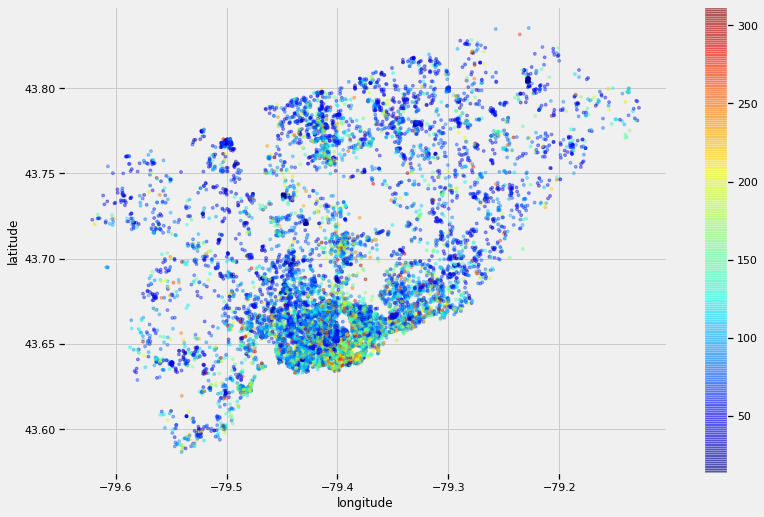

In [47]:
listings_data_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
c = listings_data_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

In [48]:
neighbourhoods = gpd.read_file('/content/drive/MyDrive/Data_Science_Project_2/neighbourhoods.geojson')
neighbourhoods.head()

,neighbourhood,neighbourhood_group,geometry
0,York University Heights,None,"MULTIPOLYGON (((-79.50529 43.75987, -79.50488 ..."
1,The Beaches,None,"MULTIPOLYGON (((-79.31485 43.66674, -79.31356 ..."
2,Scarborough Village,None,"MULTIPOLYGON (((-79.21397 43.72676, -79.21400 ..."
3,South Parkdale,None,"MULTIPOLYGON (((-79.42777 43.62979, -79.42948 ..."
4,South Riverdale,None,"MULTIPOLYGON (((-79.32868 43.64745, -79.32867 ..."


In [49]:
listings_data_clean_gdf = gpd.GeoDataFrame(listings_data_clean, geometry=gpd.points_from_xy(listings_data_clean.longitude,listings_data_clean.latitude))
listings_data_clean_gdf.head(3)

,host_id,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,neighbourhood_cleansed,latitude,longitude,property_type,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,geometry
id,,,,,,,,,,,,,,,,,,,,,
23691,93825,100.0,93.0,f,2.0,t,Briar Hill-Belgravia,43.69805,-79.45411,Private room in residential home,...,4.75,4.73,4.82,4.90,4.93,4.34,4.73,t,1.73,POINT (-79.45411 43.69805)
40456,174063,100.0,100.0,t,3.0,t,South Parkdale,43.63539,-79.44010,Entire residential home,...,4.63,4.64,4.66,4.95,4.96,4.56,4.68,f,0.89,POINT (-79.44010 43.63539)
41887,183071,100.0,83.0,t,2.0,t,Oakridge,43.69464,-79.28520,Entire rental unit,...,4.71,4.88,4.72,4.88,4.94,4.60,4.80,f,1.48,POINT (-79.28520 43.69464)


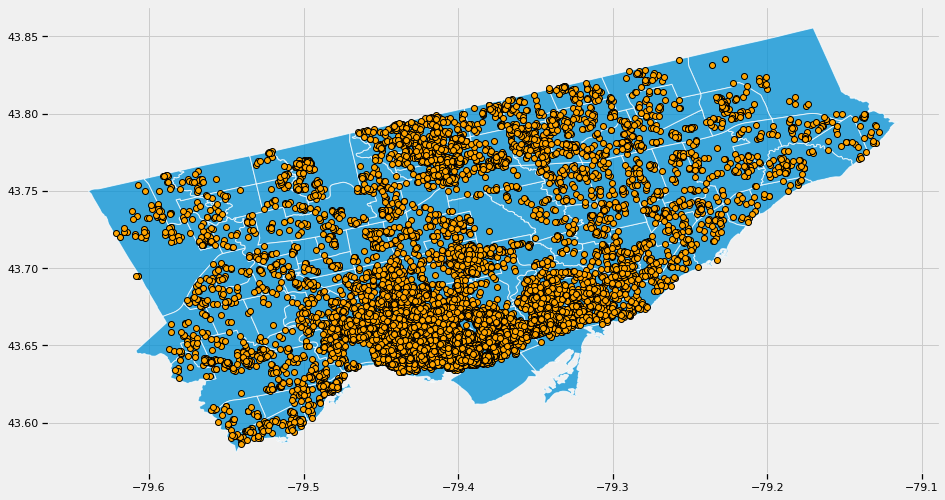

In [50]:
neighbourhoods = neighbourhoods[['neighbourhood','geometry']]
ax=neighbourhoods.plot(figsize=(15, 8), edgecolor='w', alpha=0.75);
listings_data_clean_gdf.plot(ax=ax, color='orange', edgecolor='k', label='Airbnbs');

In [51]:
neighbourhoods.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [52]:
listings_data_clean_gdf.crs={'init': 'epsg:4326'}

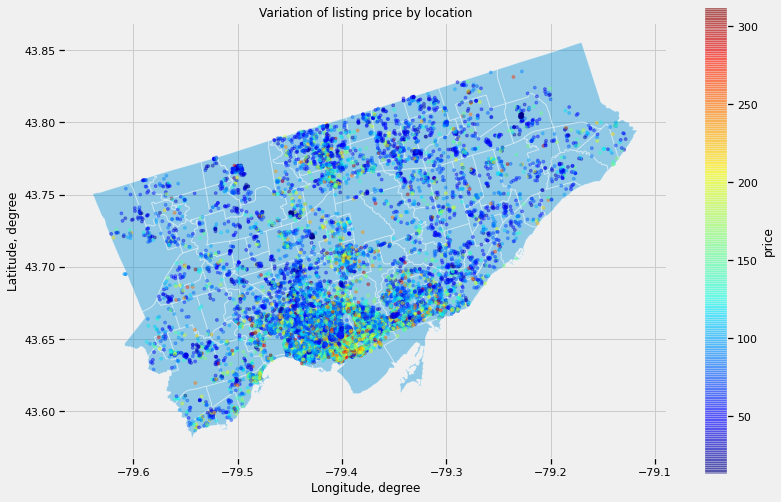

In [99]:
ax = neighbourhoods.plot(figsize=(20, 10), edgecolor='w', alpha=0.4, legend=False)
listings_data_clean.plot(ax=ax,kind='scatter', x='longitude',y='latitude',alpha=0.4,
c='price', s=8, cmap=plt.get_cmap('jet'), figsize=(12,8),legend=True )

plt.xlabel('Longitude, degree')
plt.ylabel('Latitude, degree')
plt.title('Variation of listing price by location')
plt.show();

In [54]:
neighbourhoods_price = pd.merge(neighbourhoods, price_per_neighborhood, left_on='neighbourhood', right_index=True)
neighbourhoods_price

,neighbourhood,geometry,price
0,York University Heights,"MULTIPOLYGON (((-79.50529 43.75987, -79.50488 ...",60.65
1,The Beaches,"MULTIPOLYGON (((-79.31485 43.66674, -79.31356 ...",127.04
2,Scarborough Village,"MULTIPOLYGON (((-79.21397 43.72676, -79.21400 ...",93.56
3,South Parkdale,"MULTIPOLYGON (((-79.42777 43.62979, -79.42948 ...",103.43
4,South Riverdale,"MULTIPOLYGON (((-79.32868 43.64745, -79.32867 ...",122.30
...,...,...,...
135,Milliken,"MULTIPOLYGON (((-79.24308 43.81297, -79.24433 ...",92.08
136,Pleasant View,"MULTIPOLYGON (((-79.34346 43.79517, -79.34359 ...",62.66
137,Wychwood,"MULTIPOLYGON (((-79.43592 43.68015, -79.43492 ...",92.77
138,Leaside-Bennington,"MULTIPOLYGON (((-79.37749 43.71309, -79.37762 ...",106.11


In [55]:
top20=listings_data_clean.loc[listings_data_clean['neighbourhood_cleansed'].isin(price_per_neighborhood.index[0:19]) ]
top20

,host_id,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,neighbourhood_cleansed,latitude,longitude,property_type,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,geometry
id,,,,,,,,,,,,,,,,,,,,,
44452,195095,96.0,89.0,t,13.0,t,Rosedale-Moore Park,43.671930,-79.385900,Entire rental unit,...,4.11,4.52,3.98,4.75,4.81,4.94,4.21,f,0.43,POINT (-79.38590 43.67193)
44469,195095,96.0,89.0,t,13.0,t,Rosedale-Moore Park,43.671290,-79.386340,Private room in rental unit,...,4.00,4.50,4.00,4.38,4.75,4.75,4.13,f,0.06,POINT (-79.38634 43.67129)
45399,195095,96.0,89.0,t,13.0,t,Bay Street Corridor,43.661230,-79.383360,Entire condominium (condo),...,4.17,4.55,3.93,4.64,4.67,4.91,4.24,f,0.67,POINT (-79.38336 43.66123)
45453,195095,96.0,89.0,t,13.0,t,Rosedale-Moore Park,43.671280,-79.384220,Private room in rental unit,...,4.13,4.33,3.11,4.44,4.56,5.00,4.44,f,0.07,POINT (-79.38422 43.67128)
45601,188183,0.0,0.0,f,1.0,t,South Riverdale,43.662180,-79.330380,Private room in rental unit,...,4.83,4.90,4.83,4.95,4.97,4.92,4.80,f,0.00,POINT (-79.33038 43.66218)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53659626,423172040,100.0,70.0,f,0.0,t,Waterfront Communities-The Island,43.640833,-79.382673,Entire condominium (condo),...,4.83,4.90,4.83,4.95,4.97,4.92,4.80,t,0.00,POINT (-79.38267 43.64083)
53659884,260610531,100.0,85.0,t,2.0,t,South Riverdale,43.666790,-79.346208,Private room in rental unit,...,4.83,4.90,4.83,4.95,4.97,4.92,4.80,f,0.00,POINT (-79.34621 43.66679)
53670353,367123714,97.0,99.0,f,21.0,t,Waterfront Communities-The Island,43.643148,-79.390897,Private room in condominium (condo),...,4.83,4.90,4.83,4.95,4.97,4.92,4.80,t,0.00,POINT (-79.39090 43.64315)


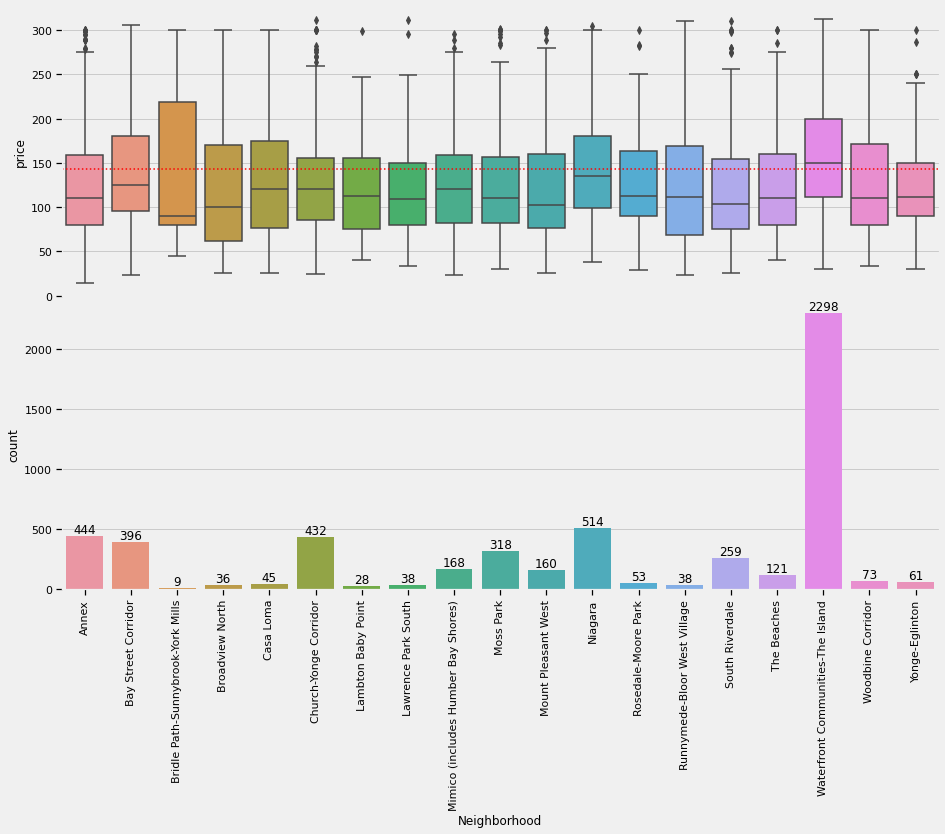

In [56]:
fig, axs = plt.subplots(nrows=2, figsize=(14, 10))

sns.boxplot(
    x='neighbourhood_cleansed',
    y='price',
    data=top20.sort_values('neighbourhood_cleansed'),
    ax=axs[0]
)

sns.countplot(
    x='neighbourhood_cleansed',
    data=top20.sort_values('neighbourhood_cleansed'),
    ax=axs[1]
)

# Draw median price
axs[0].axhline(
    y=top20['price'].mean(),
    color='red',
    linestyle='dotted'
)

# Label the bars with counts
for patch in axs[1].patches:
    x = patch.get_bbox().get_points()[:, 0]
    y = patch.get_bbox().get_points()[1, 1]
    axs[1].annotate(f'{int(y)}', (x.mean(), y), ha='center', va='bottom')
   
# Format x-axes
axs[1].set_xticklabels(axs[1].xaxis.get_majorticklabels(), rotation=90)
axs[0].xaxis.set_visible(False)
plt.xlabel('Neighborhood')

# Narrow the gap between the plots
plt.subplots_adjust(hspace=0.01)


fig.savefig('boxplot.png', bbox_inches='tight')


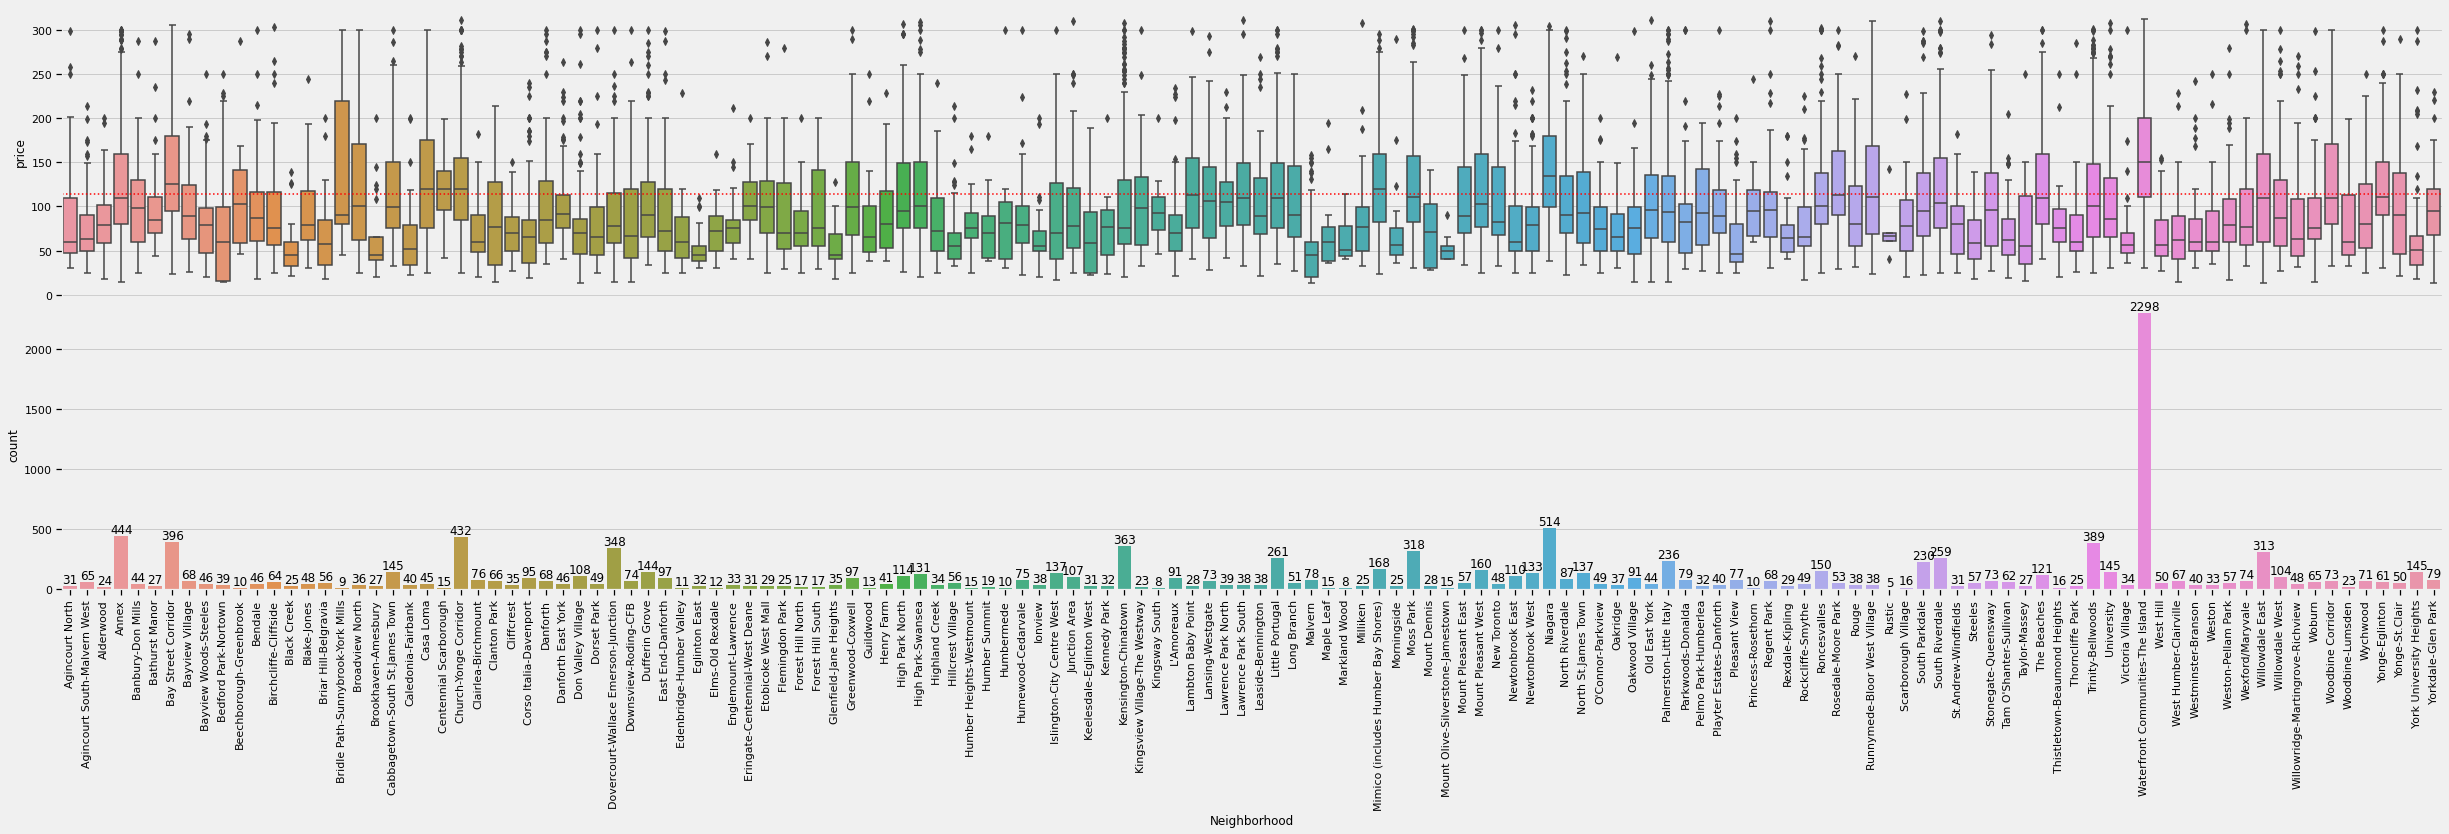

In [57]:
fig, axs = plt.subplots(nrows=2, figsize=(38, 10))

sns.boxplot(
    x='neighbourhood_cleansed',
    y='price',
    data=listings_data_clean.sort_values('neighbourhood_cleansed'),
    ax=axs[0]
)

sns.countplot(
    x='neighbourhood_cleansed',
    data=listings_data_clean.sort_values('neighbourhood_cleansed'),
    ax=axs[1]
)

# Draw median price
axs[0].axhline(
    y=listings_data_clean['price'].mean(),
    color='red',
    linestyle='dotted'
)

# Label the bars with counts
for patch in axs[1].patches:
    x = patch.get_bbox().get_points()[:, 0]
    y = patch.get_bbox().get_points()[1, 1]
    axs[1].annotate(f'{int(y)}', (x.mean(), y), ha='center', va='bottom')
   
# Format x-axes
axs[1].set_xticklabels(axs[1].xaxis.get_majorticklabels(), rotation=90)
axs[0].xaxis.set_visible(False)
plt.xlabel('Neighborhood')

# Narrow the gap between the plots
plt.subplots_adjust(hspace=0.01)


fig.savefig('boxplot.png', bbox_inches='tight')

Text(0.5, 1.0, 'Average listing price per neighberhood')

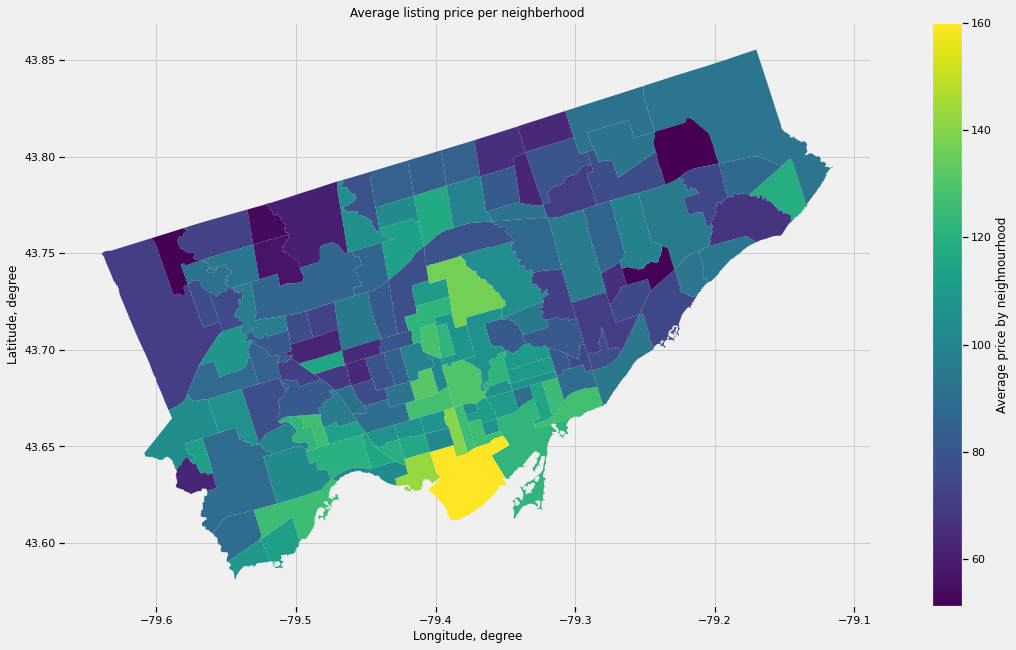

In [95]:
ax = neighbourhoods_price.plot(column='price',
                             legend=True,
                             figsize=[20,10],
                             legend_kwds={'label':'Average price by neighnourhood'})
plt.xlabel('Longitude, degree')
plt.ylabel('Latitude, degree')
plt.title('Average listing price per neighberhood')

### Which neighborhoods is most poular?

Text(0.5, 1.0, 'Average yearly booked listings per neighborhoods')

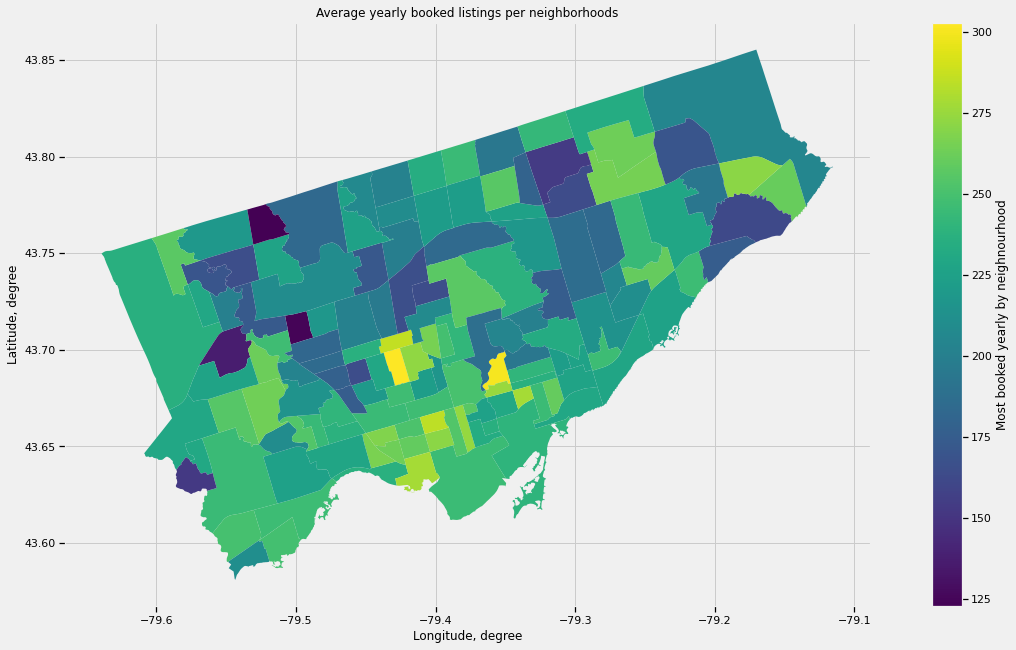

In [97]:
listings_data_clean['booked']=365-listings_data_clean['availability_365']
popular_neighborhoods=listings_data_clean.groupby(listings_data_clean['neighbourhood_cleansed'])['booked'].mean().round(2).sort_values(ascending=False).to_frame()
popular_per_neigbhd = pd.merge(neighbourhoods, popular_neighborhoods, left_on='neighbourhood', right_index=True)
ax = popular_per_neigbhd.plot(column='booked',
                             legend=True,
                             figsize=[20,10],
                             legend_kwds={'label':'Most booked yearly by neighnourhood'})
plt.xlabel('Longitude, degree')
plt.ylabel('Latitude, degree')
plt.title('Average yearly booked listings per neighborhoods')

In [91]:
popular_neighborhoods.head(10)

,booked
neighbourhood_cleansed,
Humewood-Cedarvale,302.77
Broadview North,299.97
Forest Hill North,286.12
University,284.65
Niagara,278.43
Blake-Jones,278.38
Playter Estates-Danforth,275.12
Church-Yonge Corridor,274.47
Forest Hill South,272.71


### Airbnb Ratings and reviews 
This first visualisation is using the original data containing nulls



In [60]:
import plotly.graph_objects as go
import plotly.offline as pyo


categories = ['Accuracy', 'Value', 'Location', 'Communication', 'Cleanliness','Check in']
categories = [*categories, categories[0]]

Airbnb_raitings = [listings_data['review_scores_accuracy'].mean(), listings_data['review_scores_value'].mean(), listings_data['review_scores_location'].mean(), listings_data['review_scores_communication'].mean(), listings_data['review_scores_cleanliness'].mean(), listings_data['review_scores_checkin'].mean()]
Airbnb_raitings = [*Airbnb_raitings, Airbnb_raitings[0]]

fig = go.Figure(
    data=[
        go.Scatterpolar(r=Airbnb_raitings, theta=categories, name='Airbnb ratings')
    ],
    layout=go.Layout(
        title=go.layout.Title(text='Airbnb ratings'),
        polar={'radialaxis': {'visible': True}},
        showlegend=False
    )
)

pyo.plot(fig)

'temp-plot.html'

Text(0.5, 1.0, 'Average frequency of reviews per neighborhood')

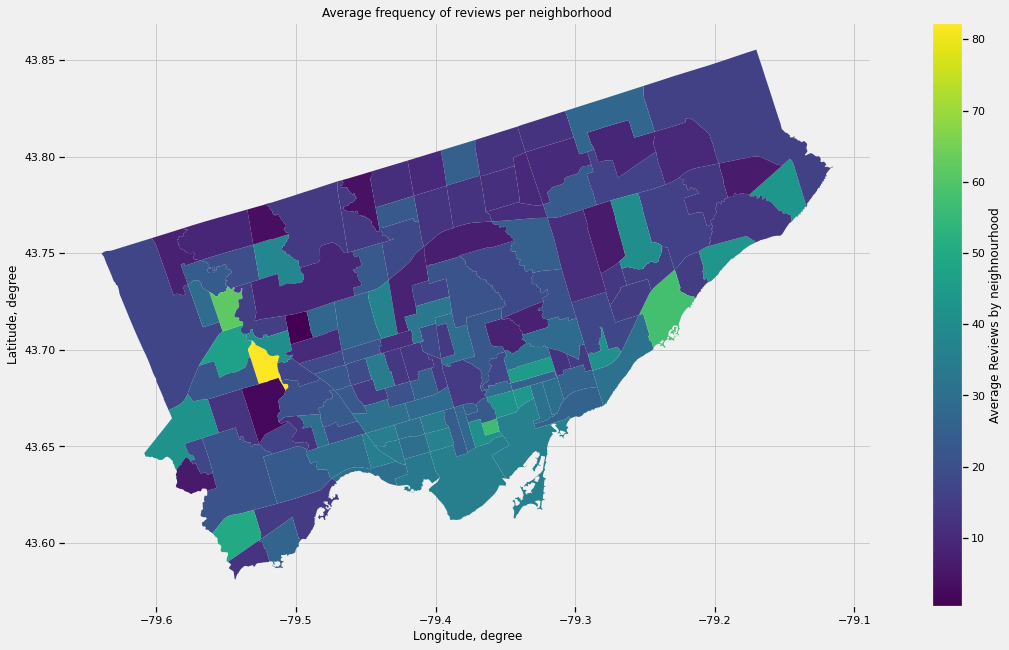

In [98]:
review_per_neigbhd=listings_data_clean.groupby(listings_data_clean['neighbourhood_cleansed'])['number_of_reviews'].mean().round(2).sort_values(ascending=False).to_frame()
review_per_neigbhd = pd.merge(neighbourhoods, review_per_neigbhd, left_on='neighbourhood', right_index=True)
ax = review_per_neigbhd.plot(column='number_of_reviews',
                             legend=True,
                             figsize=[20,10],
                             legend_kwds={'label':'Average Reviews by neighnourhood'})
plt.xlabel('Longitude, degree')
plt.ylabel('Latitude, degree')
plt.title('Average frequency of reviews per neighborhood')

In [62]:
mean_rating = listings_data['review_scores_rating'].mean() # overall rating 
round(mean_rating,2)

4.65

In [63]:
rating_over_threshold=listings_data['review_scores_rating'][listings_data['review_scores_rating'] >4.5].count()*100/listings_data['review_scores_rating'].count()
print('Percentage of listings above 4.5 rating: ', rating_over_threshold.round(2)) # percentage of rated above 4.5

Percentage of listings above 4.5 rating:  81.04


We can observe a high rating overall, for that let's check quickly the sentiments in the reviews file 

In [64]:
!pip install vaderSentiment

     |████████████████████████████████| 125 kB 6.2 MB/s 


In [65]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [66]:
reviews=pd.read_csv('/content/drive/MyDrive/Data_Science_Project_2/reviews.zip.csv')
#reviews['comments'] = reviews['comments'].str.lower() 
sent = SentimentIntensityAnalyzer()
reviews['comments']=reviews['comments'].astype(str)
polarity = [round(sent.polarity_scores(i)['compound'], 2) for i in reviews['comments']]
reviews['sentiment_score'] = polarity
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,sentiment_score
0,1419,38924112,2015-07-19,11308465,Marcela,Having the opportunity of arriving to Alexandr...,0.99
1,1419,44791978,2015-08-29,9580285,Marco,We have no enough words to describe how beauty...,0.66
2,1419,45957133,2015-09-07,38394721,Andrea,The listing was exceptional and an even better...,0.99
3,1419,67295154,2016-03-28,3515044,Shaun,Alexandra's home was amazing and in such a nea...,0.97
4,1419,177702208,2017-08-03,13987100,Kate,Beautiful home. Very comfortable and clean. Pe...,0.98


In [68]:
reviewstoprice=pd.merge(reviews,listings_data_clean['price'],how='left', left_on='listing_id',right_index=True)
reviewstoprice.dropna()

,listing_id,id,date,reviewer_id,reviewer_name,comments,sentiment_score,price
176,23691,48180,2010-05-31,109523,Jacob,Truly the ideal AirBnB host and hostess! Very...,0.97,72.0
177,23691,77873,2010-08-13,182411,Juan,Very nice experience. Yohan and Sarah are grea...,0.99,72.0
178,23691,82030,2010-08-21,162862,Micha,Sarah and Yohan are very nice and friendly peo...,0.85,72.0
179,23691,86672,2010-08-29,180780,Michael,You will feel at home no problem here =) Yohan...,0.97,72.0
180,23691,97210,2010-09-14,223477,Philipp,yohan and sarah are fantastic hosts. they are ...,0.96,72.0
...,...,...,...,...,...,...,...,...
400418,53549594,506523429184915741,2021-11-29,433736240,Grace,I would rate Sharon’s place as one of the nice...,0.98,89.0
400419,53557758,510902345255787942,2021-12-05,346724029,Stanley,Thank you place was awesome,0.77,214.0
400420,53576436,509373156170499674,2021-12-03,417538162,Lisa,"Great space and location, friendly host",0.81,75.0
400421,53614280,510130613923138950,2021-12-04,185120497,Andrew,really good place,0.49,80.0


In [69]:
review_score_price=reviewstoprice.groupby(reviewstoprice['listing_id']).mean()
review_score_price=review_score_price.dropna()

Text(0.5, 1.0, 'Review score VS Price')

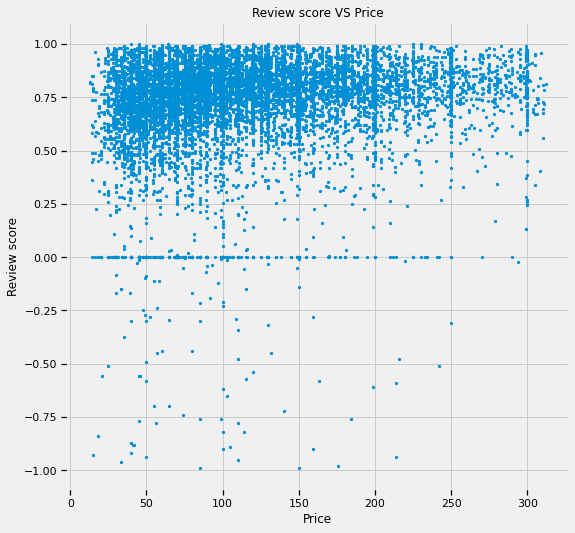

In [70]:
plt.figure(figsize=(8,8))
plt.scatter(review_score_price['price'],review_score_price['sentiment_score'],s=5)
plt.xlabel('Price')
plt.ylabel('Review score')
plt.title('Review score VS Price')

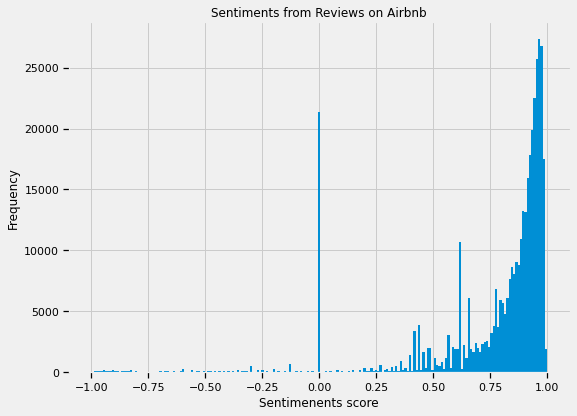

In [71]:
ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity 
plt.hist(reviews['sentiment_score'],len(reviews['sentiment_score'].unique()))
plt.title('Sentiments from Reviews on Airbnb')
plt.xlabel('Sentimenents score')
plt.ylabel('Frequency')
plt.show()
grid=False

We can observe a high scores meaning a positive feedback which support the high ratings results

### Calendar 
Let's see how the price changes monthly, to do that we have the calendar file extracted in december 2021

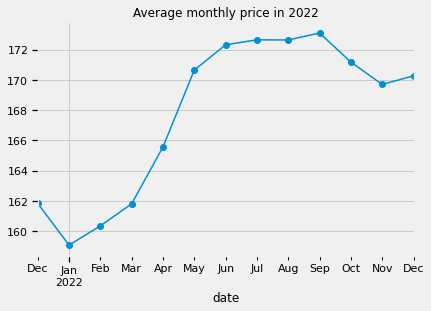

In [72]:
price_rates = pd.read_csv('/content/drive/MyDrive/Data_Science_Project_2/calendar.zip.csv')
price_rates_2022 = price_rates.copy()
price_rates_2022['date'] = pd.to_datetime(price_rates_2022['date'], errors='coerce')
price_rates_2022['price'] = price_rates_2022['price'].apply(lambda x : x.replace('$', '').replace(',', '') if isinstance(x, str) else x).astype('float')

price_month=price_rates_2022.groupby(price_rates_2022['date'].dt.to_period('M'))['price'].agg('mean').round(2).to_frame()

price_month.plot(marker="o",legend=False)
plt.title('Average monthly price in 2022');

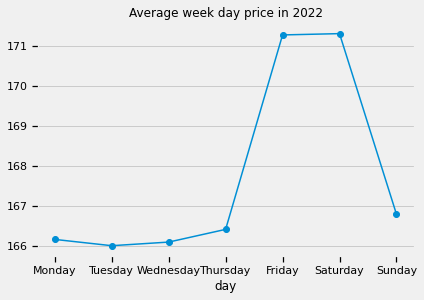

In [73]:

price_rates_2022['day'] = price_rates_2022['date'].dt.day_name()
daily_price_2022 = price_rates_2022.groupby(price_rates_2022['day'])['price'].mean().to_frame()
daily_price_2022 = daily_price_2022.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
daily_price_2022.plot(marker="o",legend=False)
plt.grid(False, axis='x')
plt.title('Average week day price in 2022');

The price is higher for rents on friday and saturday nights

In [74]:
availability_2022 = price_rates_2022[['date', 'available']]
# 1 will represent an occupied listing
availability_2022['booked'] = availability_2022.available.map(lambda x : 0 if x == 't' else 1)
# we grouped by day to get the daily average availability
availability_2022['date'] = pd.to_datetime(availability_2022['date'], errors='coerce')
availability_2022 = availability_2022.groupby(availability_2022['date'].dt.to_period('D'))['booked'].mean().to_frame()
availability_2022['booked']=availability_2022['booked']*100
availability_2022

,booked
date,
2021-12-05,98.638132
2021-12-06,81.617406
2021-12-07,75.817550
2021-12-08,73.661446
2021-12-09,73.274789
...,...
2022-12-01,69.724771
2022-12-02,69.718218
2022-12-03,69.724771


<Figure size 1080x504 with 0 Axes>

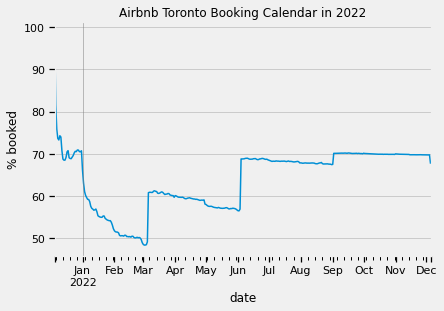

In [75]:
plt.figure(figsize=(15, 7))
availability_2022.plot(legend=False,grid=True)
plt.title('Airbnb Toronto Booking Calendar in 2022')
plt.ylabel('% booked')
plt.grid(False, axis='x')
plt.axvline(x='Jan 2022',color='gray', linewidth=0.5)

plt.show();

(120.0, 250.0)

<Figure size 1080x504 with 0 Axes>

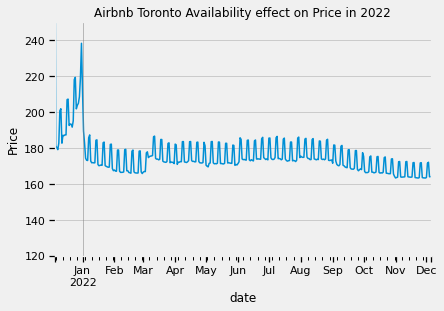

In [76]:
availability_price_2022=price_rates_2022[price_rates_2022['available']=='t']
availability_price_2022=availability_price_2022.groupby(availability_price_2022['date'].dt.to_period('D'))['price'].mean().to_frame()
availability_price_2022
plt.figure(figsize=(15, 7))
availability_price_2022.plot(legend=False)

plt.title('Airbnb Toronto Availability effect on Price in 2022')
plt.ylabel('Price')
plt.grid(False, axis='x')
plt.axvline(x='Jan 2022',color='gray', linewidth=0.5)
plt.ylim(120,250)
#plt.show();

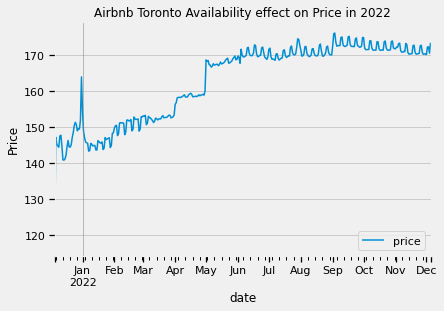

In [77]:
unavailability_price_2022=price_rates_2022[price_rates_2022['available']=='f']
unavailability_price_2022=unavailability_price_2022.groupby(unavailability_price_2022['date'].dt.to_period('D'))['price'].mean().to_frame()
unavailability_price_2022
unavailability_price_2022.plot(label='Unavailable')
plt.title('Airbnb Toronto Availability effect on Price in 2022')
plt.ylabel('Price')
plt.grid(False, axis='x')
plt.legend()
plt.axvline(x='Jan 2022',color='gray', linewidth=0.5)


Let's do the same to the calendar extracted in march 2021

Text(0.5, 1.0, 'Average monthly price in 2021')

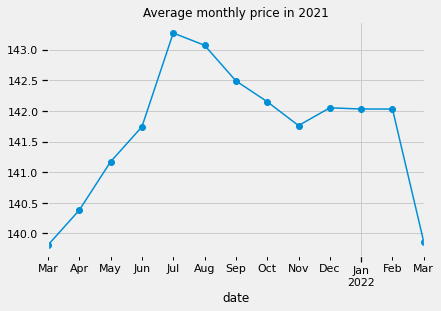

In [78]:
price_rates=pd.read_csv('/content/drive/MyDrive/Data_Science_Project_2/calendar_march.csv')
price_rates_2021=price_rates.copy()
price_rates_2021['date']=pd.to_datetime(price_rates_2021['date'], errors='coerce')
price_rates_2021['price'] = price_rates_2021['price'].apply(lambda x : x.replace('$', '').replace(',', '') if isinstance(x, str) else x).astype('float')

price_month=price_rates_2021.groupby(price_rates_2021['date'].dt.to_period('M'))['price'].agg('mean').round(2).to_frame()

price_month.plot(  marker="o",legend=False)
plt.title('Average monthly price in 2021')

Text(0.5, 1.0, 'Average week day price in 2021')

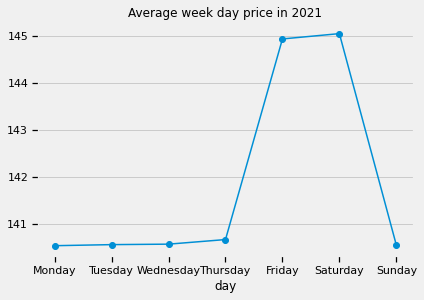

In [79]:
price_rates_2021['day']=price_rates_2021['date'].dt.day_name()
daily_price_2021=price_rates_2021.groupby(price_rates_2021['day'])['price'].mean().to_frame()
daily_price_2021=daily_price_2021.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
daily_price_2021.plot(  marker="o",legend=False)
plt.grid(False, axis='x')
plt.title('Average week day price in 2021')

<Figure size 1080x504 with 0 Axes>

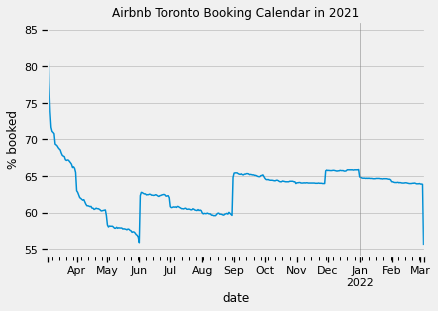

In [80]:
availability_2021 = price_rates_2021[['date', 'available']]
# 1 will represent an occupied listing
availability_2021['booked'] = availability_2021.available.map(lambda x : 0 if x == 't' else 1)
# we grouped by day to get the daily average availability
availability_2021['date'] = pd.to_datetime(availability_2021['date'], errors='coerce')
availability_2021 = availability_2021.groupby(availability_2021['date'].dt.to_period('D'))['booked'].mean().to_frame()
plt.figure(figsize=(15, 7))

availability_2021['booked']=availability_2021['booked']*100
availability_2021.plot(legend=False)
plt.title('Airbnb Toronto Booking Calendar in 2021')
plt.ylabel('% booked')
plt.grid(False, axis='x')
plt.axvline(x='Jan 2022',color='gray', linewidth=0.5)
plt.show();

(120.0, 250.0)

<Figure size 1080x504 with 0 Axes>

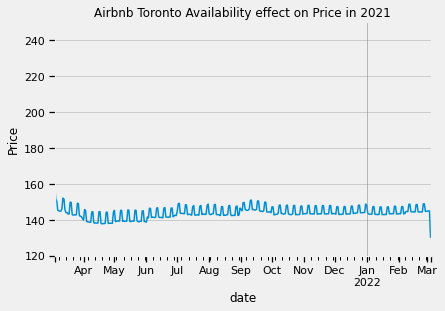

In [81]:
availability_price_2021=price_rates_2021[price_rates_2021['available']=='t']
availability_price_2021=availability_price_2021.groupby(availability_price_2021['date'].dt.to_period('D'))['price'].mean().to_frame()
availability_price_2021
plt.figure(figsize=(15, 7))
availability_price_2021.plot(legend=False)

plt.title('Airbnb Toronto Availability effect on Price in 2021')
plt.ylabel('Price')
plt.grid(False, axis='x')
#plt.legend()
plt.axvline(x='Jan 2022',color='gray', linewidth=0.5)
plt.ylim(120,250)

# Saving the Final Cleaned Listings File

In [82]:
listings_data_clean.to_csv('/content/drive/MyDrive/Data_Science_Project_2/listings_cleaned.csv')

In [83]:
listings_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13780 entries, 23691 to 53684479
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   host_id                      13780 non-null  int64   
 1   host_response_rate           13780 non-null  float64 
 2   host_acceptance_rate         13780 non-null  float64 
 3   host_is_superhost            13780 non-null  object  
 4   host_listings_count          13780 non-null  float64 
 5   host_has_profile_pic         13780 non-null  object  
 6   neighbourhood_cleansed       13780 non-null  object  
 7   latitude                     13780 non-null  float64 
 8   longitude                    13780 non-null  float64 
 9   property_type                13780 non-null  object  
 10  room_type                    13780 non-null  object  
 11  accommodates                 13780 non-null  int64   
 12  bedrooms                     13780 non-null  float64 

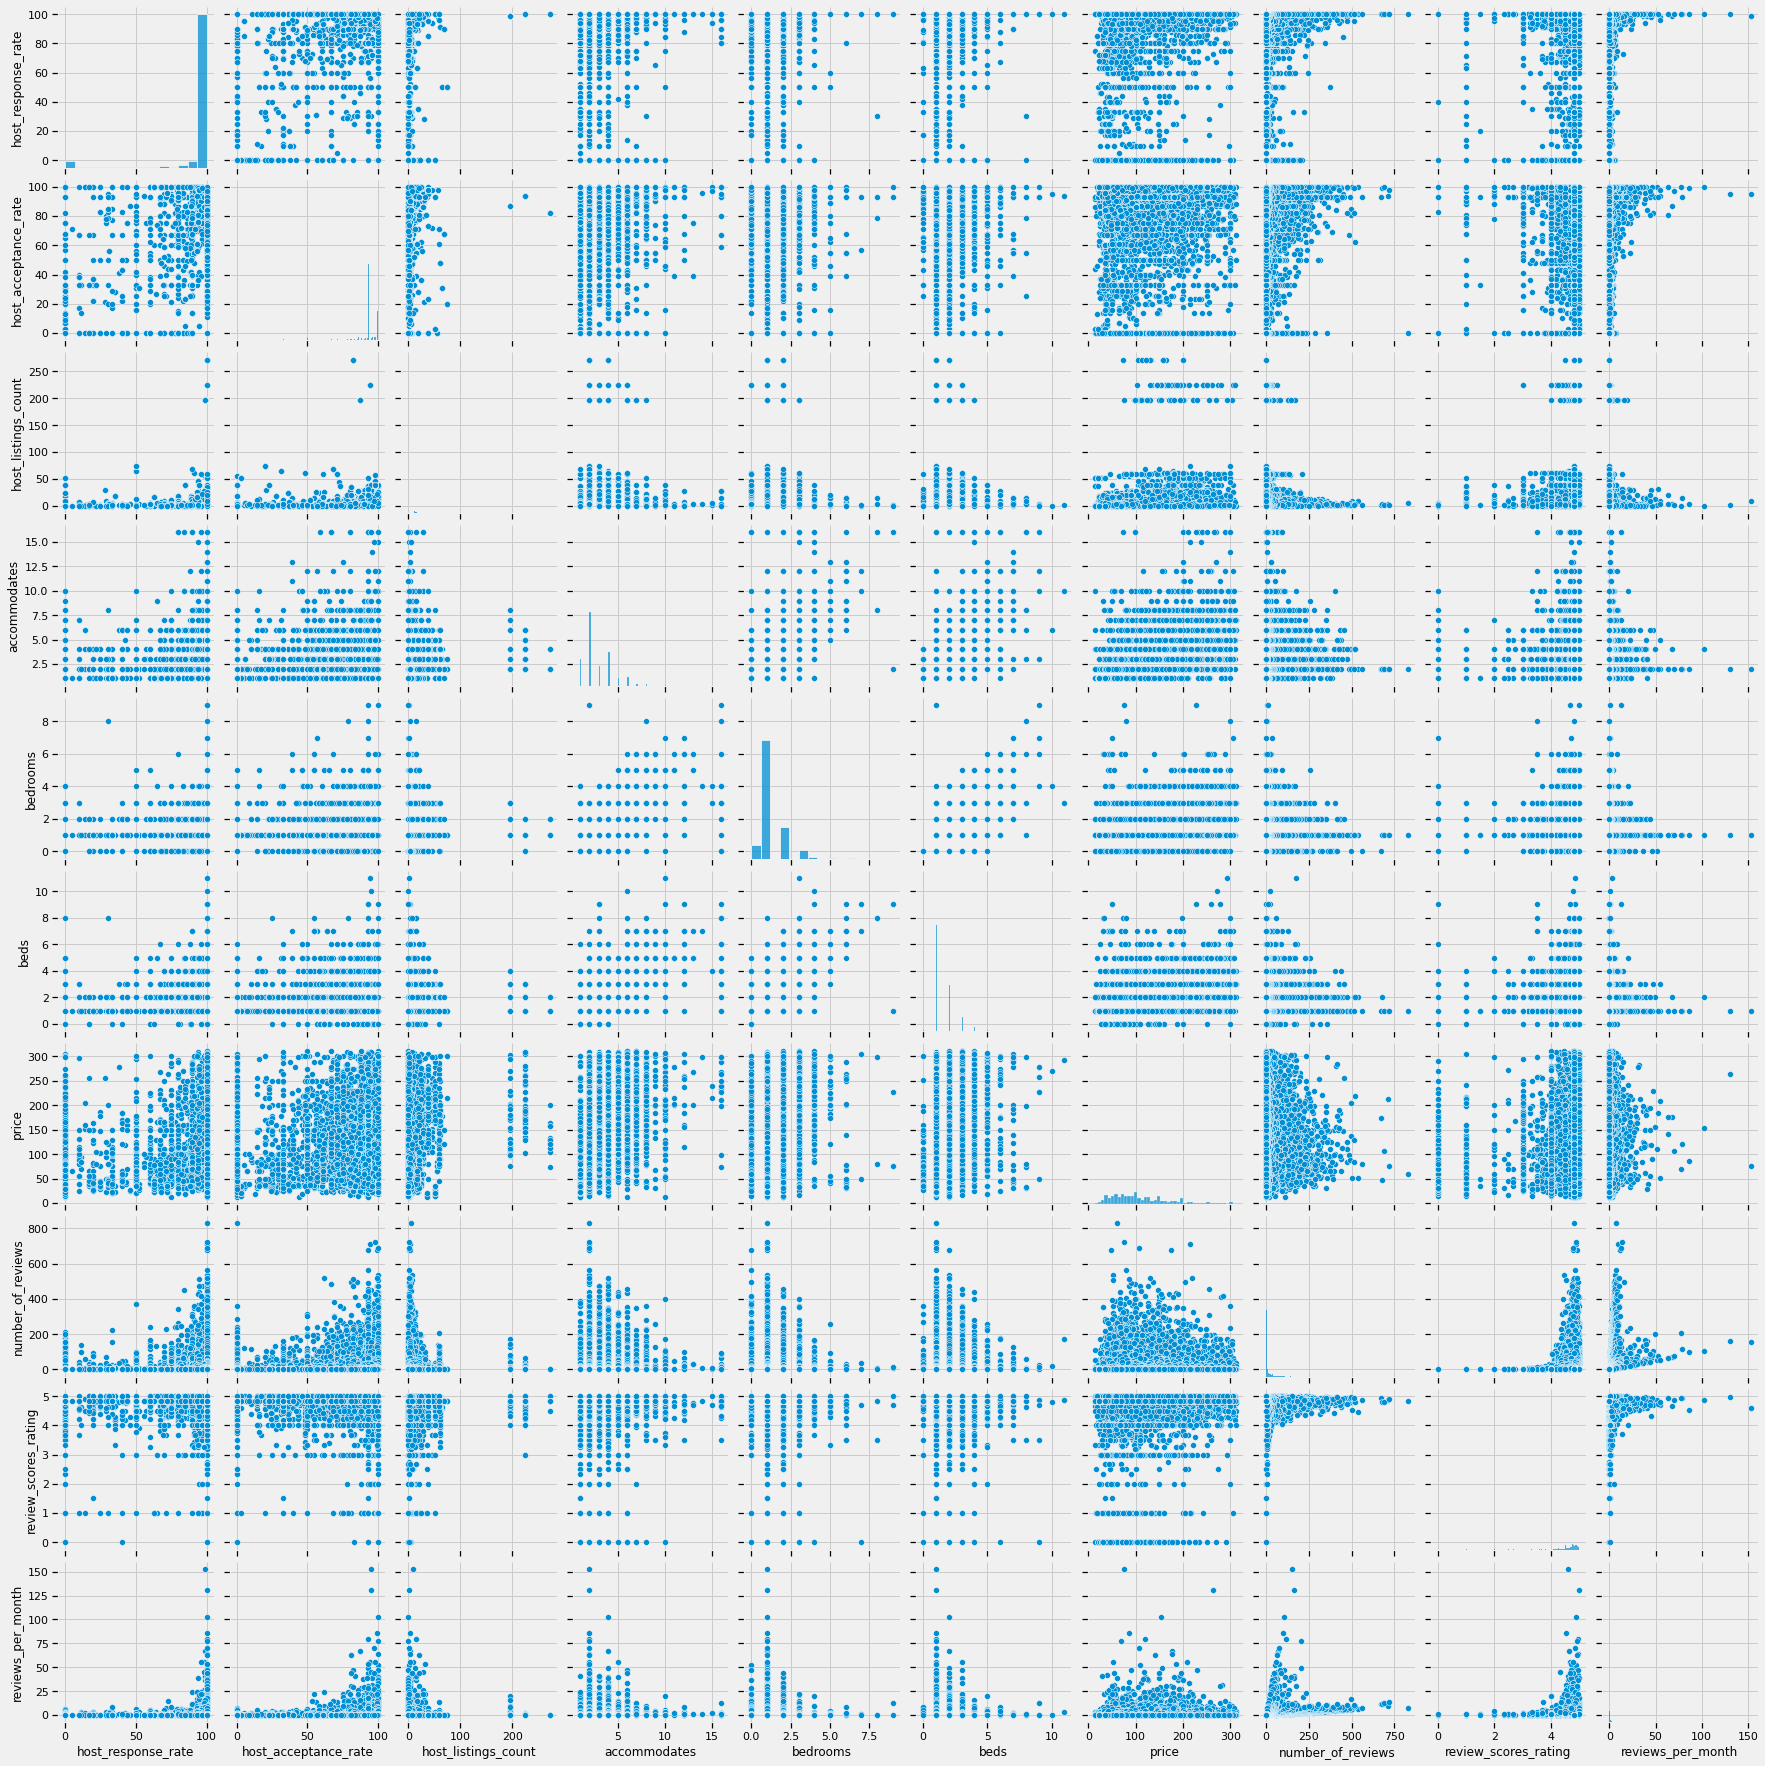

In [105]:
#num_col=['accommodates','bedrooms','beds','number_of_reviews','review_scores_rating','reviews_per_month','price','availability_90']
num_col=['host_response_rate','host_acceptance_rate','host_listings_count','accommodates','bedrooms','beds','price','number_of_reviews','review_scores_rating','reviews_per_month']
sns.pairplot(listings_data_clean[num_col])

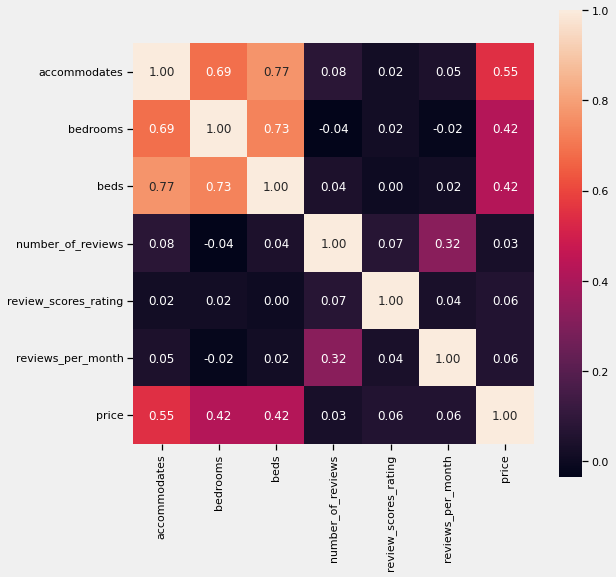

In [86]:
corr=listings_data_clean[num_col].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar=True, annot=True, square= True, fmt='.2f', xticklabels=num_col,yticklabels=num_col)